# Prediction of purchase of car insurance

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns#visualization
import itertools
from datetime import datetime
import category_encoders as ce
from pandas.api.types import is_categorical_dtype, is_string_dtype, is_object_dtype
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import RFE 
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score,precision_score,recall_score,mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df= pd.read_csv('carInsurance_train.csv')
df.T.head(19)

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
Id,1,2,3,4,5,6,7,8,9,10,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000
Age,32,32,29,25,30,32,37,35,30,30,...,27,55,34,42,48,28,49,27,36,45
Job,management,blue-collar,management,student,management,technician,admin.,management,admin.,blue-collar,...,technician,unemployed,technician,technician,blue-collar,technician,admin.,admin.,entrepreneur,services
Marital,single,married,single,single,married,single,single,divorced,married,married,...,single,single,married,single,married,single,divorced,single,single,married
Education,tertiary,primary,tertiary,primary,tertiary,tertiary,tertiary,tertiary,secondary,secondary,...,secondary,tertiary,secondary,secondary,secondary,tertiary,secondary,secondary,tertiary,primary
Default,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Balance,1218,1156,637,373,2694,1625,1000,538,187,3,...,126,1513,0,417,1,0,124,-400,658,137
HHInsurance,1,1,1,1,0,0,1,1,1,1,...,1,1,1,0,0,1,1,0,1,1
CarLoan,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
Communication,telephone,NaN,cellular,cellular,cellular,cellular,cellular,NaN,cellular,cellular,...,cellular,NaN,cellular,cellular,NaN,cellular,cellular,cellular,cellular,NaN


In [3]:
### Cleaning the dataset

In [4]:
# Function to slice and dice the dataset to find ket properties

def dataset_analyze(df):
    with pd.option_context("display.max_rows", None):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        return info.sort_values('percent missing', ascending =False)

dataset_analyze(df)

,data type,percent missing,No. unique,unique values
Outcome,object,76.050,4,"[nan, failure, other, success]"
Communication,object,22.550,3,"[telephone, nan, cellular]"
Education,object,4.225,4,"[tertiary, primary, secondary, nan]"
Job,object,0.475,12,"[management, blue-collar, student, technician,..."
LastContactMonth,object,0.000,12,"[jan, may, jun, mar, nov, jul, aug, sep, apr, ..."
CallEnd,object,0.000,3764,"[13:46:30, 14:52:08, 16:36:04, 12:20:22, 14:38..."
CallStart,object,0.000,3777,"[13:45:20, 14:49:03, 16:30:24, 12:06:43, 14:35..."
PrevAttempts,int64,0.000,20,"[0, 1, 12, 3, 4, 2, 13, 7, 5, 6, 8, 10, 11, 30..."
DaysPassed,int64,0.000,330,"[-1, 119, 109, 97, 114, 362, 95, 169, 91, 558,..."
NoOfContacts,int64,0.000,35,"[2, 5, 1, 4, 8, 3, 14, 7, 6, 12, 11, 25, 34, 9..."


In [5]:
###  Handling Missing values

In [6]:
# Filling the missing values that nan, using frontfill i.e. the missing value will be filled by the will be propagated by the last valid observation forward.
# Using frontfill to fill the missing values in Job and Education fields, as these feilds have lesser amount of missing values

df['Job'] = df['Job'].fillna(method ='pad')
df['Education'] = df['Education'].fillna(method ='pad')
df['DaysPassed'] = df['DaysPassed'].replace(-1, 0)# changing -1 which means  that the customer is not contacted to 0

def df_normalize_strings(df):
    for col in df.columns:
        if is_string_dtype(df[col]) or is_object_dtype(df[col]):
            df[col] = df[col].str.lower()
            df[col] = df[col].fillna(np.nan)
            df[col] = df[col].replace('', np.nan)

            
df_normalize_strings(df)  

In [7]:
df.isnull().sum()

Id                     0
Age                    0
Job                    0
Marital                0
Education              0
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [8]:
df.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [9]:
### EDA

In [10]:
# Creating a new column to determine time duration in minutes

start_time_=pd.to_datetime(df['CallStart'],format='%H:%M:%S')
end_time=pd.to_datetime(df['CallEnd'],format='%H:%M:%S')
df['CallDuration']=(end_time-start_time_).astype('timedelta64[m]')

print(df['CallDuration'].max()) # longest call was for 54 mintutes

54.0


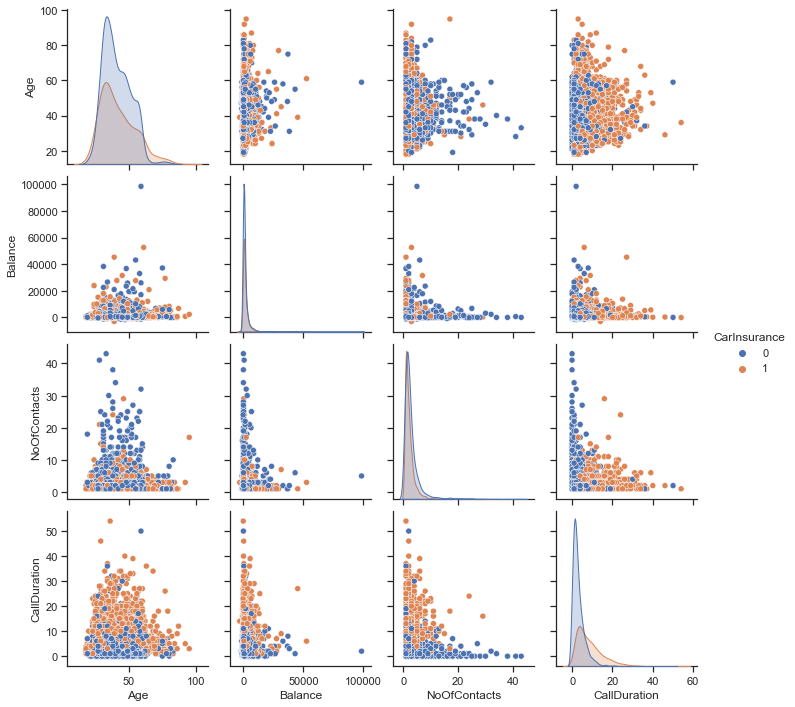

In [11]:
EDA_df = ['Age','Balance','NoOfContacts','CarInsurance','CallDuration']
sns.set_theme(style="ticks")
sns.pairplot(df[EDA_df], hue="CarInsurance")

# here we can observe a few things
# * Older people are more inclined to buy the insurance after more reach outs by the sales rep (Age vs No.of contacts)
# * Younger people are more likey to purchase insurance if call durations are kept below 30 mins (Age vs)
# * People with less balance require more convincing to buy as it can be seen by longer call durations (balnace vs call duration)

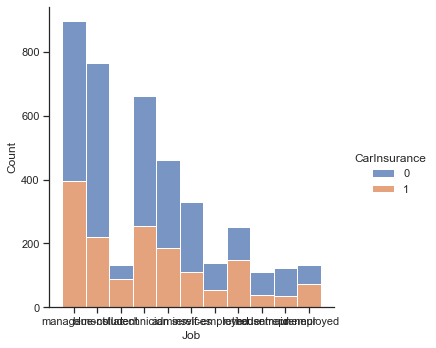

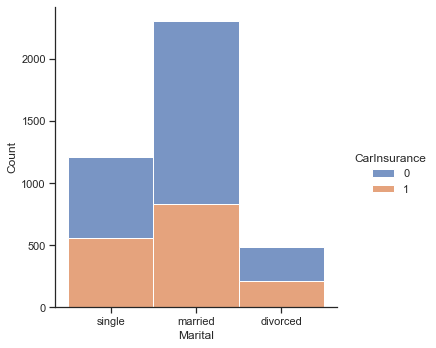

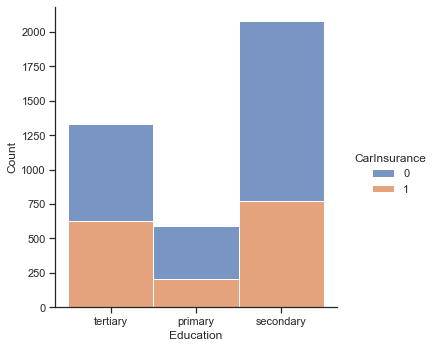

In [12]:
# EDA for a few categorical variables

EDA_Df2=['Job', 'Marital', 'Education']
for i in EDA_Df2:
    sns.displot(data=df, x=df[i], hue="CarInsurance", multiple="stack")

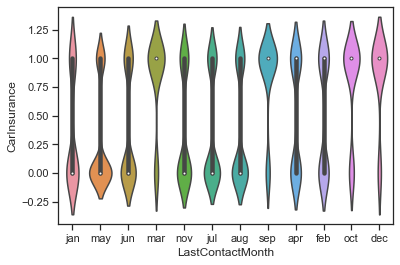

In [13]:
# violin chart
# Based on the thicknesss of each plot we can observe which month most customers purchsed the insurance after the last contact was made by the sales rep
# Look like most carinsurace is sold during March and September

sns.violinplot(x="LastContactMonth",y='CarInsurance',data=df);

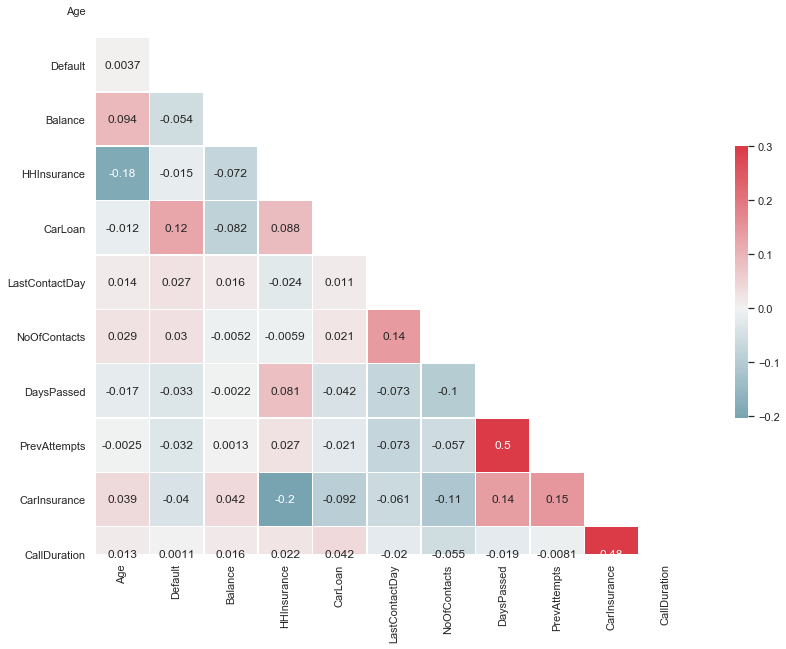

In [14]:
# Correlation

sns.set(style="white")
corr = df.loc[:, df.columns != 'Id'].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [15]:
## Feature Enigineering

In [16]:
df= df.drop(['Id'],axis = 1)

def df_string_to_cat(df):
    for col in df.columns:
        if is_string_dtype(df[col]):
            df[col] = df[col].astype('category').cat.as_ordered()

def df_cat_to_catcode(df):
    for col in df.columns:
        if is_categorical_dtype(df[col]):
            df[col] = df[col].cat.codes + 1
            
            
df_string_to_cat(df)
df_cat_to_catcode(df)          

In [17]:
dataset_analyze(df)

,data type,percent missing,No. unique,unique values
Age,int64,0.0,70,"[32, 29, 25, 30, 37, 35, 27, 53, 44, 38, 61, 3..."
LastContactMonth,int8,0.0,12,"[5, 9, 7, 8, 10, 6, 2, 12, 1, 4, 11, 3]"
CarInsurance,int64,0.0,2,"[0, 1]"
CallEnd,int16,0.0,3764,"[1915, 2394, 3112, 1315, 2294, 2519, 1600, 273..."
CallStart,int16,0.0,3777,"[1966, 2418, 3146, 1264, 2327, 2496, 1641, 278..."
Outcome,int8,0.0,4,"[0, 1, 2, 3]"
PrevAttempts,int64,0.0,20,"[0, 1, 12, 3, 4, 2, 13, 7, 5, 6, 8, 10, 11, 30..."
DaysPassed,int64,0.0,330,"[0, 119, 109, 97, 114, 362, 95, 169, 91, 558, ..."
NoOfContacts,int64,0.0,35,"[2, 5, 1, 4, 8, 3, 14, 7, 6, 12, 11, 25, 34, 9..."
LastContactDay,int64,0.0,31,"[28, 26, 3, 11, 22, 17, 12, 18, 1, 29, 27, 19,..."


# Modelling

### Base line model

In [20]:
X = df.drop(['CarInsurance'],axis=1)
y = df['CarInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [21]:
ensemble_clf =[LogisticRegression(max_iter=100000,fit_intercept=True, penalty='l2'),
               LinearSVC(loss='hinge',random_state=100),
               SVC(),
               KNeighborsClassifier(),
               RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10),
               DecisionTreeClassifier(max_depth=28, criterion = "entropy", min_samples_split=10),
               GaussianNB()]

for clf in (ensemble_clf):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    print('Performance metrics for ',clf.__class__.__name__,' :- ')
    print('Accuracy score ', accuracy_score(y_test,y_pred))
    print('Cross val score',cross_val_score(clf, X_train,y_train, cv=10, scoring='accuracy').mean())
    print('Precision', precision_score(y_test, y_pred))
    print('Recall', recall_score(y_test, y_pred))
    print('f1', f1_score(y_test, y_pred))
    print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred))
    print("------------------------------------------------------------\n------------------------------------------------------------\n")



Performance metrics for  LogisticRegression  :- 
Accuracy score  0.7975
Cross val score 0.8006249999999999
Precision 0.75
Recall 0.7453416149068323
f1 0.747663551401869
Confusion Matrix: 
 [[398  80]
 [ 82 240]]
------------------------------------------------------------
------------------------------------------------------------

Performance metrics for  LinearSVC  :- 
Accuracy score  0.69875
Cross val score 0.5818749999999999
Precision 0.5939675174013921
Recall 0.7950310559006211
f1 0.6799468791500664
Confusion Matrix: 
 [[303 175]
 [ 66 256]]
------------------------------------------------------------
------------------------------------------------------------

Performance metrics for  SVC  :- 
Accuracy score  0.59125
Cross val score 0.5984375
Precision 0.0
Recall 0.0
f1 0.0
Confusion Matrix: 
 [[473   5]
 [322   0]]
------------------------------------------------------------
------------------------------------------------------------

Performance metrics for  KNeighborsClassi

### Improved model

In [22]:
# Using RFe to determine most important columns
classifier = RandomForestClassifier(n_estimators = 70, max_depth=50, criterion = "gini", min_samples_split=10)
rfe = RFE(classifier)
rfe = rfe.fit(X_train, y_train)
X_train.columns[rfe.support_]

Index(['Age', 'Balance', 'Communication', 'LastContactDay', 'LastContactMonth',
       'Outcome', 'CallStart', 'CallEnd', 'CallDuration'],
      dtype='object')

In [23]:
param_grid = [{'n_estimators' : [70,100,150,190],
               'max_depth': [50,60,70,],
               'criterion': ['gini', 'entropy']}]

gs = GridSearchCV(estimator=RandomForestClassifier(min_samples_split=10,random_state=123),
                  param_grid=param_grid,
                  iid=False,
                  refit=True,
                  n_jobs=-1,
                  cv=10)

gs.fit(X_train[X_train.columns[rfe.support_]],y_train)

print('Best Accuracy: %.2f%%' % (gs.best_score_*100))
print('Best Params:', gs.best_params_)

Best Accuracy: 83.25%
Best Params: {'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 100}


In [24]:
print('Test Accuracy score: %.2f%%' % (gs.best_estimator_.score(X_test[X_test.columns[rfe.support_]], y_test)*100))

Test Accuracy score: 82.88%


Top 10 features are: 
Communication
Age
Balance
Job
Default
Education
HHInsurance
CarLoan
Marital


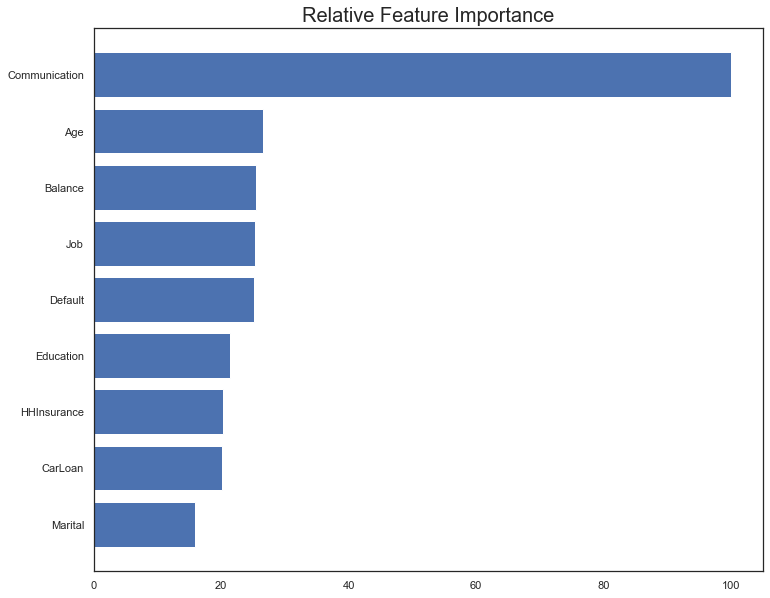

In [25]:
# Checking which features is important to a model:

importances = gs.best_estimator_.feature_importances_

# make importance relative to the max importance
feature_importance = 100.0 * (importances / importances.max())
sorted_idx = np.argsort(feature_importance)
feature_names = list(X.columns.values)
feature_names_sort = [feature_names[indice] for indice in sorted_idx]
pos = np.arange(sorted_idx.shape[0]) + .5
print ('Top 10 features are: ')
for feature in feature_names_sort[::-1][:10]:
    print (feature)

# plot the result
plt.figure(figsize=(12, 10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, feature_names_sort)
plt.title('Relative Feature Importance', fontsize=20)
plt.show()